# Chapter 4

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Import .csv and create df
df = pd.read_csv('Chapter Exercise Data.csv')
# Fill na values with zeros in df
df = df.fillna(0)
df

,OrderID,PricePerItem,Quantity,ShippingDistance,CustomerID
0,1,10,5,3.0,6671
1,2,10,10,84.0,8647
2,3,10,1,0.0,4075
3,4,10,10,92.0,8452
4,5,10,3,2.0,2621
...,...,...,...,...,...
995,996,10,8,2.0,6691
996,997,10,9,43.0,9782
997,998,10,2,10.0,1096
998,999,10,9,49.0,5319


In [17]:
# Create the Amount column
df['Amount'] = df['PricePerItem'] * df['Quantity']
# Create the df_50 DataFrame to filter those items with the amount >= 50
df_50 = df[df['Amount'] >= 50]

# Remove the Shipping Distance column
df = df.drop('ShippingDistance', axis=1)

# Create count_of_quantity series
Count_of_quantity =  df.groupby('Quantity')['OrderID'].count()
Count_of_quantity

Quantity
1     113
2      95
3      98
4      94
5      98
6      91
7     103
8     102
9      96
10    110
Name: OrderID, dtype: int64

1. John wants to see the number of products contained in each order - the distribution of quantity. Create a histogram on the Quantity column from the df DataFrame.

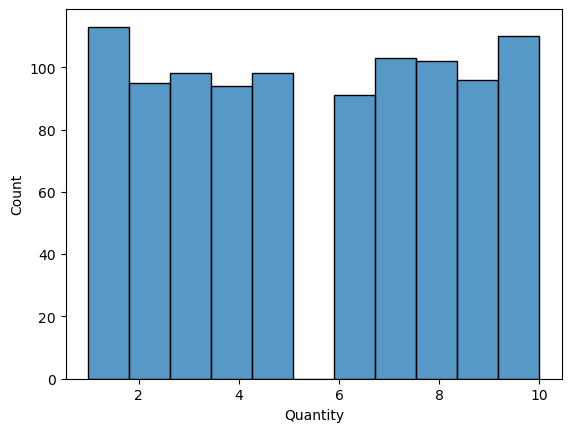

In [19]:
sns.histplot(df['Quantity']);

2. John would like to know how many orders each customers has placed. Create a bar plot to show this – each bar should be the number of orders, aggregated by the count of customers who placed that many orders.

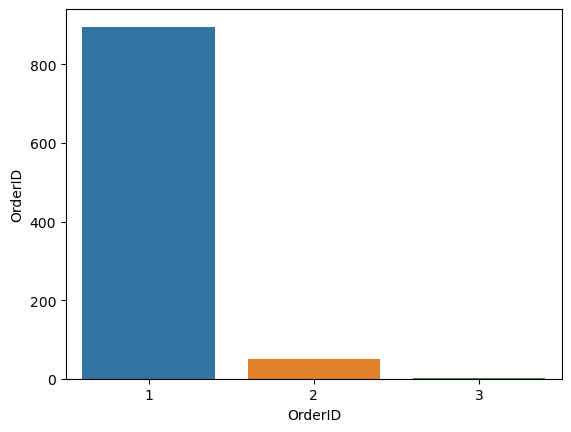

In [30]:
# Count number of OrderID for each CustomerID
cust_orders = pd.DataFrame(df.groupby('CustomerID')['OrderID'].count())
cust_orders
# Count number of Customers for each Order Quantity
orders_by_cust = pd.DataFrame(cust_orders.groupby('OrderID')['OrderID'].count())
orders_by_cust
# Create bar plot
sns.barplot(x = orders_by_cust.index, y = orders_by_cust['OrderID'], data = orders_by_cust);

3. John wants to know the relationship between the quantity of products in an order and the amount paid for that order. Create a scatter plot of Quantity vs Amount.

<AxesSubplot:xlabel='Quantity', ylabel='Amount'>

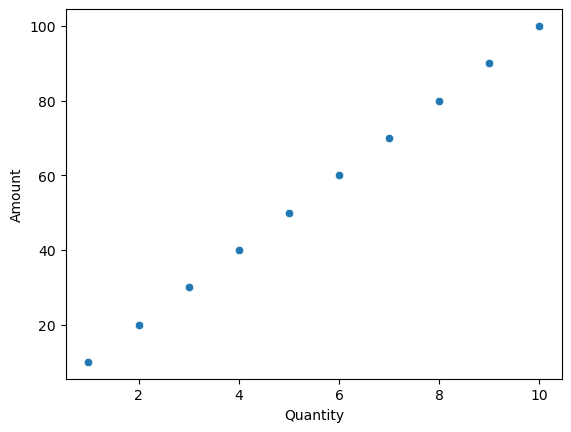

In [32]:
sns.scatterplot(x = 'Quantity', y = 'Amount', data = df)